In [ ]:
import pandas as pd
import numpy as np
from utils import *
import warnings
import pickle
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\halo4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\halo4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\halo4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Ejemplo modelo de regresión logística usando BoW

In [3]:
from sklearn.linear_model import LogisticRegression
from utils_test import *

In [5]:
df_train = pd.read_parquet('data/data_train.parquet')
df_test = pd.read_parquet('data/data_test.parquet')
df_train

,polarity,title,text
0,2,"Finally a Decent Metallica, Welcome Back Guys!!","Being a metal head from the early early 80's, ..."
1,2,There's so much Van it's easy to get lost,To anybody not familiar with Van's non-radio r...
2,1,Does not teach the TM Technique!!!,For the past few months i have been doing medi...
3,1,Horrible,This is a truly terrible book. Even though it ...
4,2,Best pregnancy purchase yet!,I love this pillow and can't imagine pregnancy...
...,...,...,...
299995,1,"OKAY, The Joke Is Over!",WOW! This collection sure SUCKS!As Simon Cowel...
299996,2,A rip-roaring adventure,I knew this was a good book before I read it. ...
299997,2,Romantic Melodies,I love all aspects of the beauty of the instru...
299998,1,Very Disappointed,I was very disappointed by these headphones. T...


In [7]:
## cambiamos la etiqueta a binario, 1 == positivo, 0== negativo 
##polarity - 1 for negative and 2 for positive
df_train['target'] = np.where(df_train['polarity']==2,1,0)
df_test['target'] = np.where(df_test['polarity']==2,1,0)

In [8]:
#1 preprocesamos el text
df_train['normalized_text'] = df_train['text'].apply(normalize_text)
df_train['tokens'] = df_train['normalized_text'].apply(nltk.word_tokenize)
df_train['tokens_no_stopwords'] = df_train['tokens'].apply(remove_stopwords)

df_test['normalized_text'] = df_test['text'].apply(normalize_text)
df_test['tokens'] = df_test['normalized_text'].apply(nltk.word_tokenize)
df_test['tokens_no_stopwords'] = df_test['tokens'].apply(remove_stopwords)

df_train


,polarity,title,text,target,normalized_text,tokens,tokens_no_stopwords
0,2,"Finally a Decent Metallica, Welcome Back Guys!!","Being a metal head from the early early 80's, ...",1,being a metal head from the early early s i ha...,"[being, a, metal, head, from, the, early, earl...","[metal, head, early, early, enjoyed, metal, co..."
1,2,There's so much Van it's easy to get lost,To anybody not familiar with Van's non-radio r...,1,to anybody not familiar with van s non radio r...,"[to, anybody, not, familiar, with, van, s, non...","[anybody, familiar, van, non, radio, repertoir..."
2,1,Does not teach the TM Technique!!!,For the past few months i have been doing medi...,0,for the past few months i have been doing medi...,"[for, the, past, few, months, i, have, been, d...","[past, months, meditation, daily, since, readi..."
3,1,Horrible,This is a truly terrible book. Even though it ...,0,this is a truly terrible book even though it i...,"[this, is, a, truly, terrible, book, even, tho...","[truly, terrible, book, even, though, extremem..."
4,2,Best pregnancy purchase yet!,I love this pillow and can't imagine pregnancy...,1,i love this pillow and can t imagine pregnancy...,"[i, love, this, pillow, and, can, t, imagine, ...","[love, pillow, imagine, pregnancy, without, go..."
...,...,...,...,...,...,...,...
299995,1,"OKAY, The Joke Is Over!",WOW! This collection sure SUCKS!As Simon Cowel...,0,wow this collection sure sucks as simon cowell...,"[wow, this, collection, sure, sucks, as, simon...","[wow, collection, sure, sucks, simon, cowell, ..."
299996,2,A rip-roaring adventure,I knew this was a good book before I read it. ...,1,i knew this was a good book before i read it h...,"[i, knew, this, was, a, good, book, before, i,...","[knew, good, book, read, husband, made, read, ..."
299997,2,Romantic Melodies,I love all aspects of the beauty of the instru...,1,i love all aspects of the beauty of the instru...,"[i, love, all, aspects, of, the, beauty, of, t...","[love, aspects, beauty, instrumentals, mannhei..."
299998,1,Very Disappointed,I was very disappointed by these headphones. T...,0,i was very disappointed by these headphones th...,"[i, was, very, disappointed, by, these, headph...","[disappointed, headphones, srs, mode, distorte..."


In [9]:
from gensim.models import Word2Vec

In [ ]:
w2v_model = Word2Vec(df_train['tokens_no_stopwords'], min_count=1, vector_size=100, window=5, sg=1)

In [28]:
with open("w2v_model.pkl", "wb") as f:
    pickle.dump(w2v_model, f)

In [12]:
embeddingsSize=w2v_model.vector_size
def getVectors(dataset):
  singleDataItemEmbedding=np.zeros(embeddingsSize)
  vectors=[]
  for dataItem in dataset:
    wordCount=0
    for word in dataItem:
      if word in w2v_model.wv.index_to_key:
        singleDataItemEmbedding=singleDataItemEmbedding+w2v_model.wv[word]
        wordCount=wordCount+1

    singleDataItemEmbedding=singleDataItemEmbedding/wordCount
    vectors.append(singleDataItemEmbedding)
  return vectors

In [13]:
trainVectors=getVectors(df_train['tokens_no_stopwords'])
testVectors=getVectors(df_test['tokens_no_stopwords'])

## Guardar vectores

### guardar en pickel

In [27]:
import pickle


with open("trainVectors.pkl", "wb") as f:
    pickle.dump(trainVectors, f)
    
with open("testVectors.pkl", "wb") as f:
    pickle.dump(testVectors, f)

In [ ]:
with open("trainVectors.pkl", "rb") as f:
    trainVectors = pickle.load(f)
    
with open("testVectors.pkl", "rb") as f:
    testVectors = pickle.load(f)

### Json

In [ ]:
import json

with open("trainVectors.json", "w") as f:
    json.dump(trainVectors, f)
    
with open("testVectors.json", "w") as f:
    json.dump(testVectors, f)

In [ ]:
with open("trainVectors.json", "r") as f:
    trainVectors = json.load(f)
    
with open("testVectors.json", "r") as f:
    testVectors = json.load(f)

### csv

In [29]:
import csv

with open("df_train.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(df_train)
    
with open("df_test.csv", "w", newline='') as f:
    writer = csv.writer(f)
    writer.writerow(df_test)

In [30]:
with open("df_train.csv", "r") as f:
    reader = csv.reader(f)
    df_train = next(reader)
    
with open("df_test.csv", "r") as f:
    reader = csv.reader(f)
    df_test = next(reader)

## Continuamos

In [ ]:
from sklearn.neural_network import MLPClassifier

clfMLP = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
clfMLP.fit(trainVectors, df_train["target"])

testLabelsPredicted=list(clfMLP.predict(testVectors))

In [19]:
X_train = trainVectors
X_test = testVectors
y_train = df_train['target']
y_test = df_test['target']

In [20]:
y_pred_proba = clfMLP.predict_proba(X_test)[:,1]

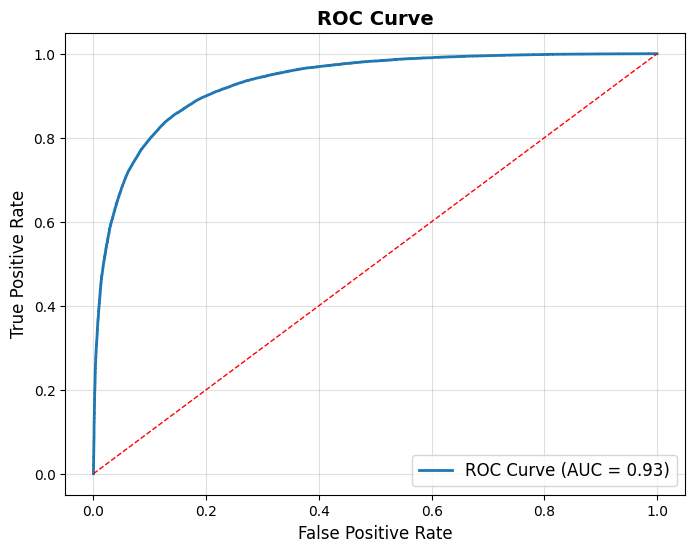

In [21]:
# ROC-AUC
plot_roc_auc(y_pred_proba, y_test)

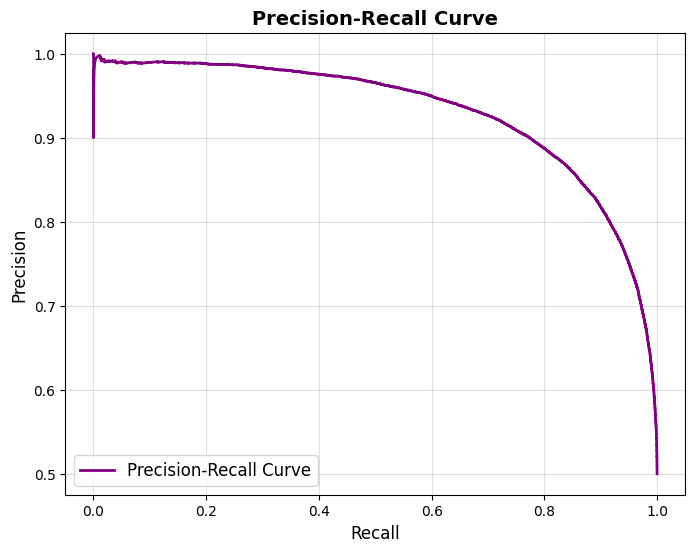

In [22]:
# PR curve
plot_precision_recall_curve(y_pred_proba, y_test)

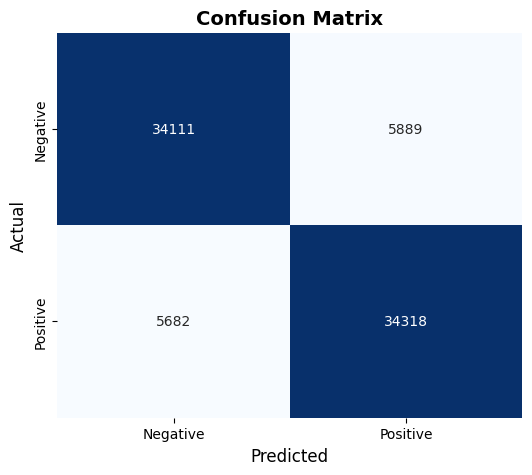

Classification Metrics:

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85     40000
    Positive       0.85      0.86      0.86     40000

    accuracy                           0.86     80000
   macro avg       0.86      0.86      0.86     80000
weighted avg       0.86      0.86      0.86     80000

Accuracy: 0.86


In [23]:
# conf matriz
plot_confusion_matrix_and_metrics(y_pred_proba, y_test, threshold=0.5)